In [ ]:
import pandas as pd

## EDA With Red Wine Data

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests):
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data):
- 12 - quality (score between 0 and 10)

In [ ]:
df = pd.read_csv('winequality-red.csv',sep = ';')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [ ]:
# checking info
df.info()
# conclusion there is no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.shape # 1599 rows and 12 cols

(1599, 12)

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
# descriptive summary
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

# observation

Based on the minimum and maximum values of the quality column, the wine dataset does not contain extremely high-quality wines (like 9 or 10) and also does not include extremely poor-quality wines (like 1 or 2). The quality values mostly lie between 3 and 8, indicating that the dataset represents average to moderate-quality wines.

In [ ]:
# checking the duplicate value in dataset
df[df.duplicated()]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

In [ ]:
# removing the duplicate values
df.drop_duplicates(inplace = True)

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

In [ ]:
df.shape

(1359, 12)

In [ ]:
# correlation
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.111025   0.085886            -0.140580   
volatile acidity           -0.002449   0.055154            -0.020945   
citric acid                 0.143892   0.210195            -0.048004   
residual sugar              1.000000   0.026656             0.160527   
chlorides                   0.026656   1.000000             0.000749   
free sulfur dioxide         0.160527   0.000749             1.000000   
total sulfur dioxide        0.201038   0.045773             0.667246   
density                     0.324522   0.193592            -0.018071   
pH                         -0.083143  -0.270893             0.056631   
sulphates                  -0.011837   0.394557             0.054126   
alcohol                     0.063281  -0.223824            -0.080125   
quality                     0.013640  -0.130988            -0.050463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.103777  0.670195 -0.686685   0.190269   
volatile acidity                  0.071701  0.023943  0.247111  -0.256948   
citric acid                       0.047358  0.357962 -0.550310   0.326062   
residual sugar                    0.201038  0.324522 -0.083143  -0.011837   
chlorides                         0.045773  0.193592 -0.270893   0.394557   
free sulfur dioxide               0.667246 -0.018071  0.056631   0.054126   
total sulfur dioxide              1.000000  0.078141 -0.079257   0.035291   
density                           0.078141  1.000000 -0.355617   0.146036   
pH                               -0.079257 -0.355617  1.000000  -0.214134   
sulphates                         0.035291  0.146036 -0.214134   1.000000   
alcohol                          -0.217829 -0.504995  0.213418   0.091621   
quality                          -0.177855 -0.184252 -0.055245   0.248835   

                       alcohol   quality  
fixed acidity        -0.061596  0.119024  
volatile acidity     -0.197812 -0.395214  
citric acid           0.105108  0.228057  
residual sugar        0.063281  0.013640  
chlorides            -0.223824 -0.130988  
free sulfur dioxide  -0.080125 -0.050463  
total sulfur dioxide -0.217829 -0.177855  
density              -0.504995 -0.184252  
pH                    0.213418 -0.055245  
sulphates             0.091621  0.248835  
alcohol               1.000000  0.480343  
quality               0.480343  1.000000

# MULTIVARIATE

<Axes: >

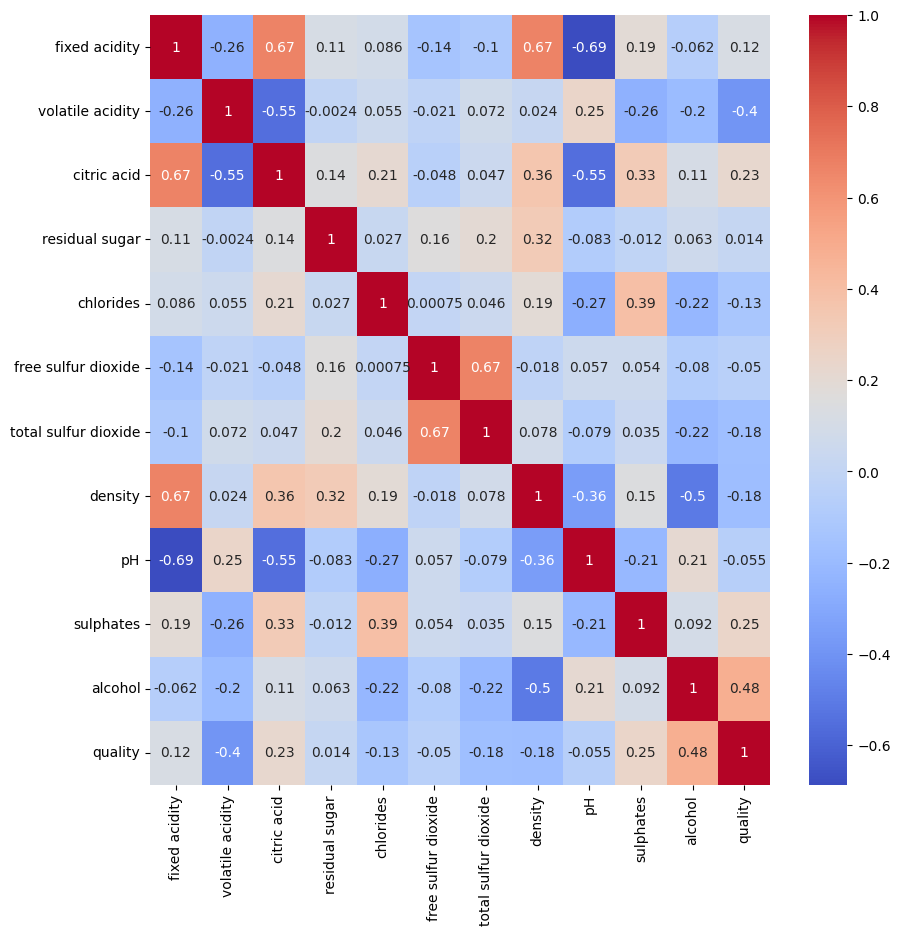

In [ ]:
# visulization of correlation

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm')

# conclusion from the heatmap

“Based on the correlation analysis, none of the features show a strong relationship with the target variable (quality). The relationships observed are only weak to moderate. Alcohol (+0.48) and volatile acidity (–0.40) show moderate correlation with quality, while all other features have weak or very weak correlations. Therefore, wine quality cannot be explained by any single feature; it is influenced by multiple factors with small contributions.”

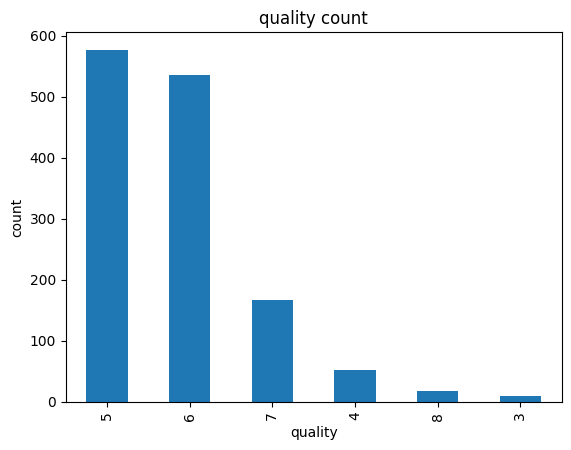

In [ ]:
df['quality'].value_counts().plot(kind='bar')
plt.xlabel('quality')
plt.ylabel('count')
plt.title('quality count')
plt.show()


# UNIVARIATE

# observation

It is an imbalanced dataset
The wine quality dataset is imbalanced, as the majority of observations belong to quality classes 5 and 6, while very few samples are present in the lower (3, 4) and higher (7, 8) quality categories.

<Axes: xlabel='alcohol', ylabel='Count'>

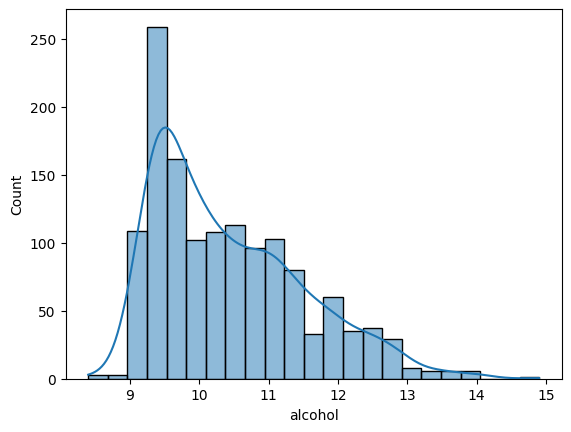

In [ ]:
sns.histplot(df['alcohol'],kde=True)

#Observation:

The alcohol feature shows a right-skewed distribution, indicating that most wine samples have alcohol content between 9% and 11%. Higher alcohol values are less frequent, resulting in a long right tail. This suggests that wines with very high alcohol content are relatively rare in the dataset.

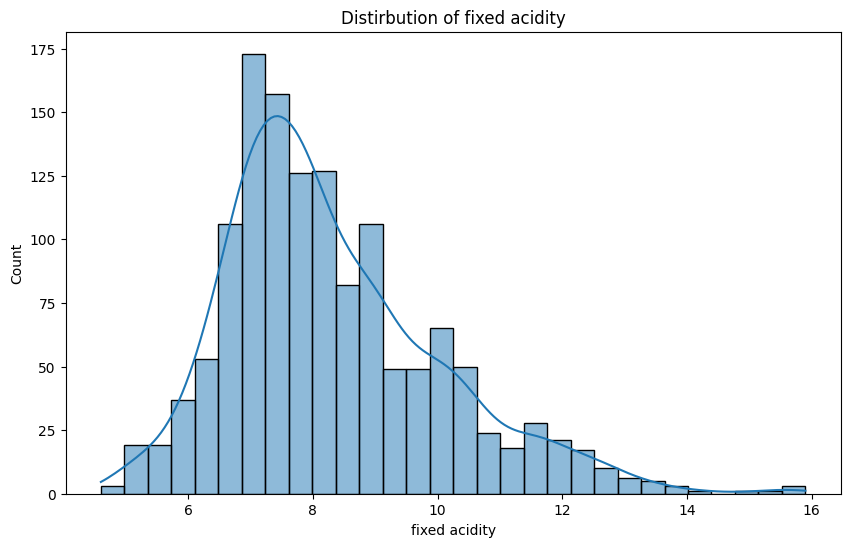

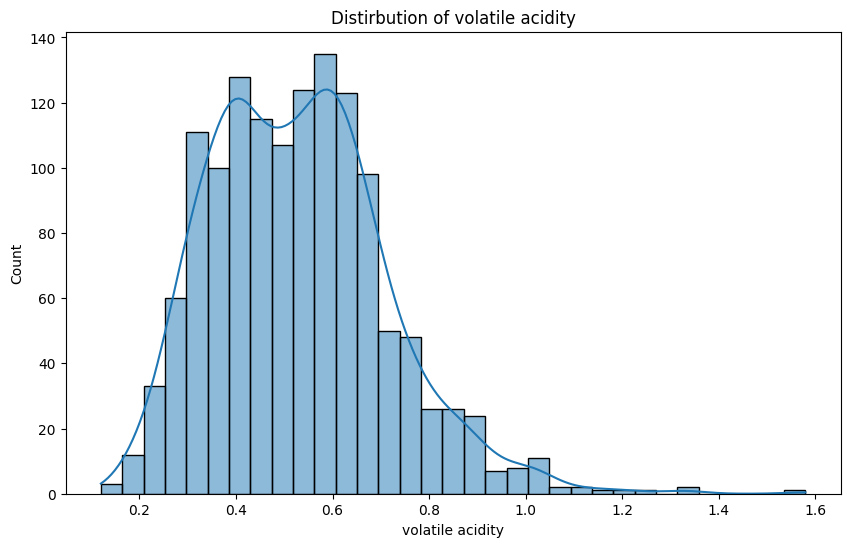

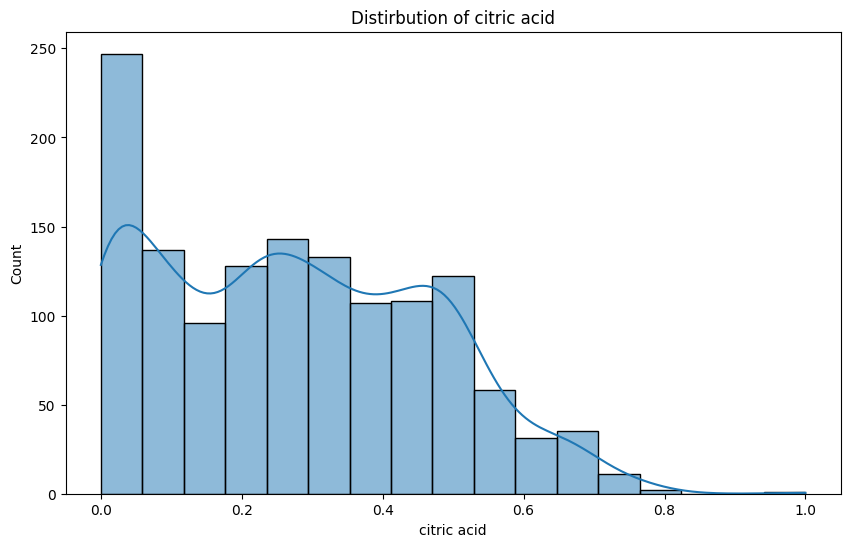

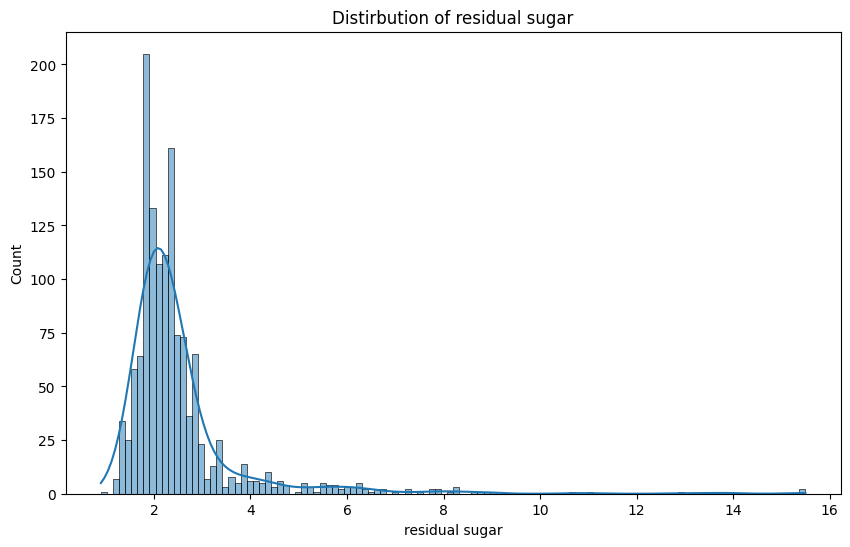

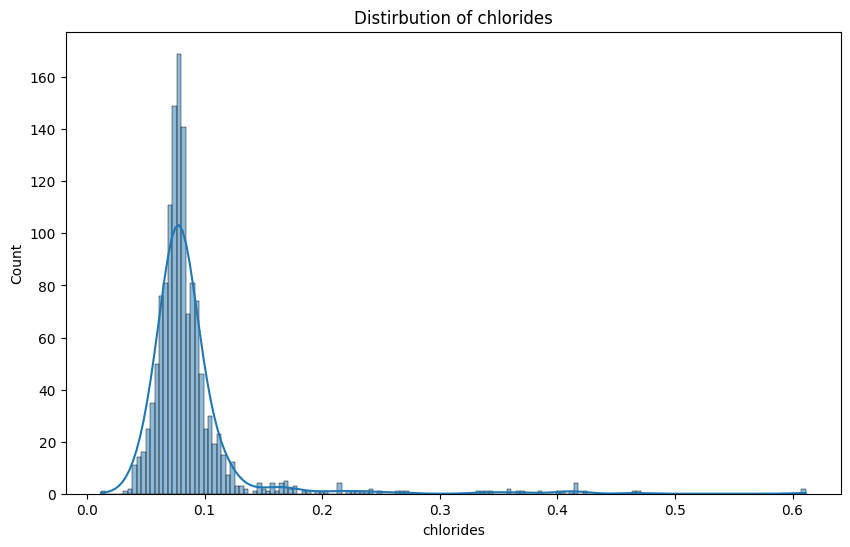

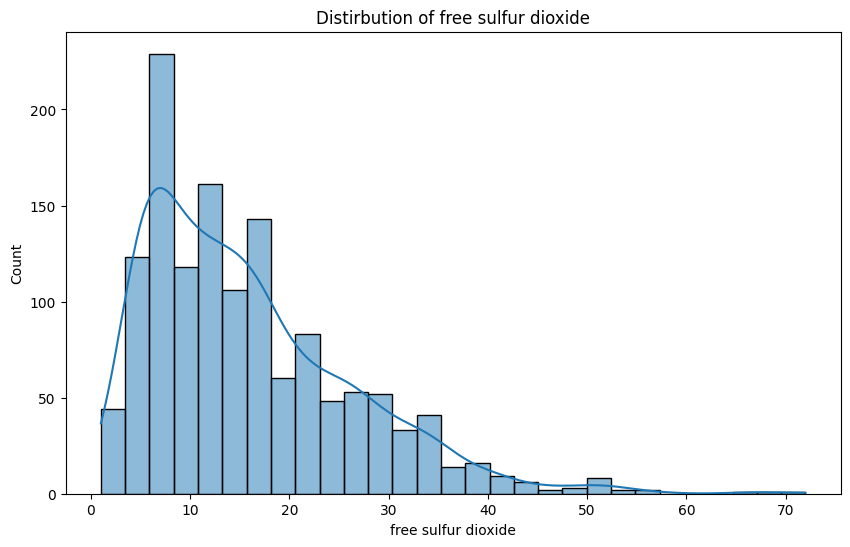

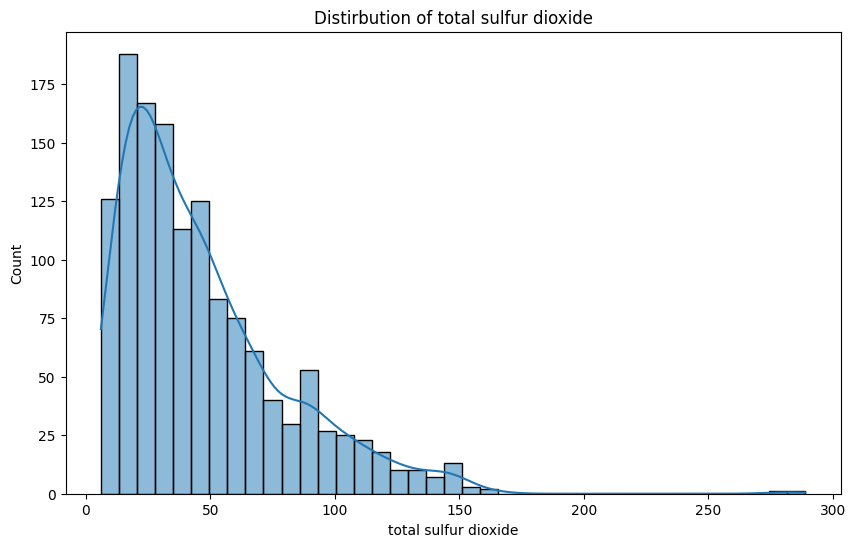

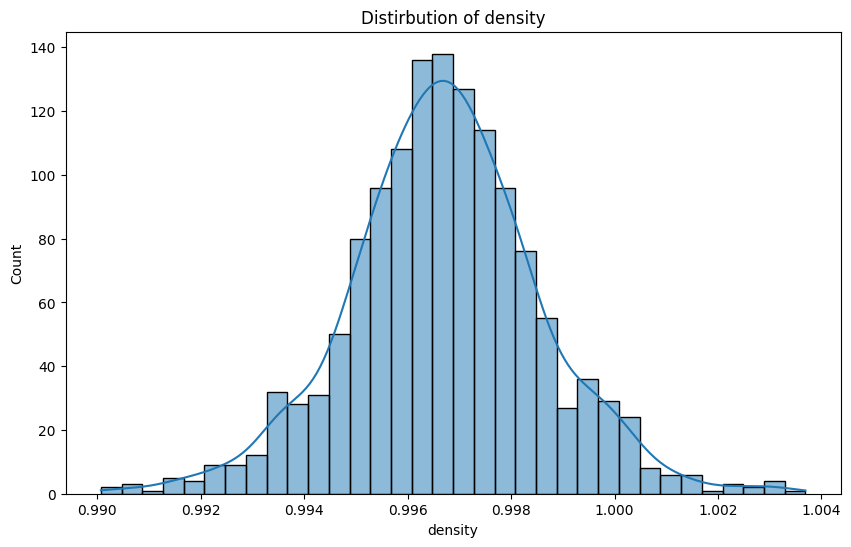

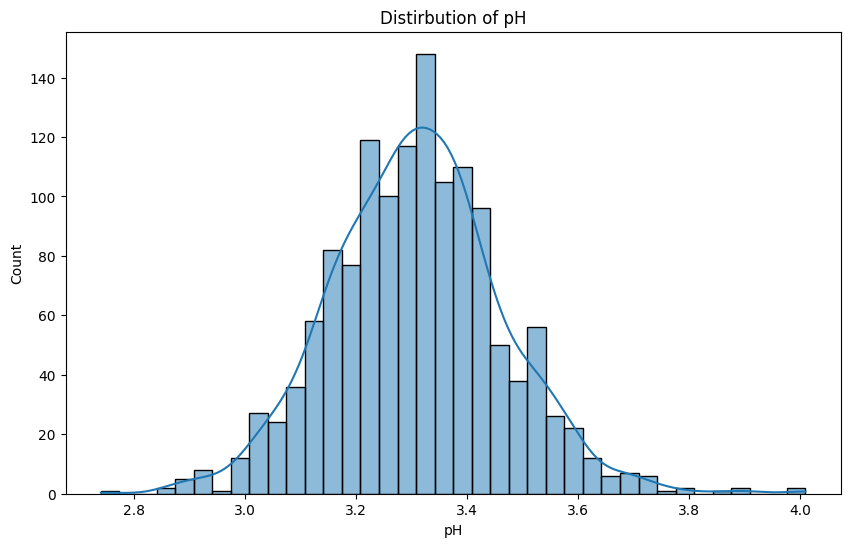

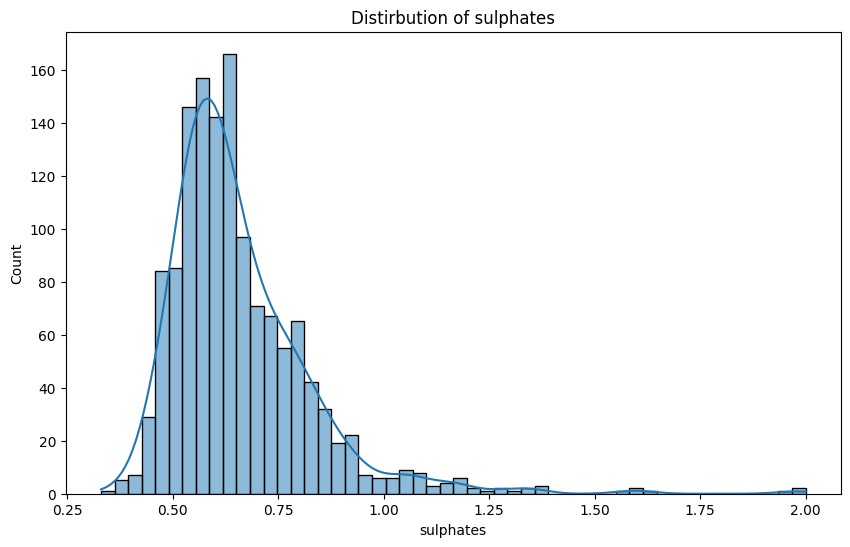

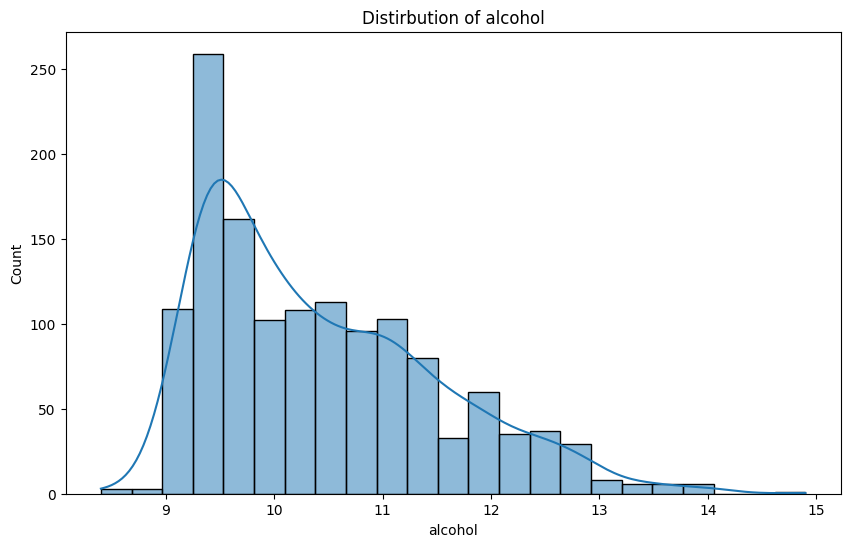

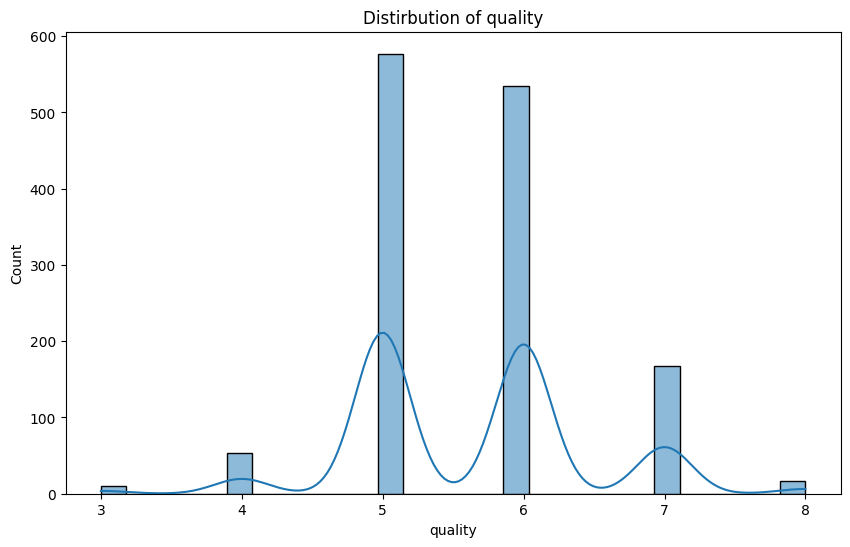

In [ ]:
for column in df.columns:
  plt.figure(figsize = (10,6))
  sns.histplot(df[column],kde = True)
  plt.title(f'Distirbution of {column}')
  plt.show()

# observation of fixed acidity histplot

The fixed acidity feature shows a right-skewed distribution, with most values concentrated between 6 and 9. A small number of wines exhibit high fixed acidity levels, resulting in a long right tail. This indicates that extremely high acidity wines are relatively uncommon in the dataset.

# observation of volatile acidity

The distribution of volatile acidity shows that most wines fall within a moderate range (approximately 0.3 to 0.8). Extremely low and extremely high volatile acidity values are rare. The distribution is right-skewed, indicating the presence of a few wines with unusually high volatile acidity.

# observation of residual sugar

The distribution of residual sugar is right-skewed, with most wines having low residual sugar values concentrated around 1.5 - 2.5. A few wines exhibit very high residual sugar values, indicating the presence of outliers. Residual sugar shows a very weak correlation with wine quality but has a positive relationship with density. Higher density is slightly associated with lower wine quality.

# observation of citric acid

The distribution of citric acid shows that most wines have low to moderate citric acid values, primarily concentrated between 0.0 and 0.5. Higher citric acid values above 0.6 are rare, indicating a right-skewed distribution with a few outliers.

# Observation of chlorides

The distribution of chlorides shows that most wines have low chloride levels, concentrated around 0.04 to 0.10. The distribution is right-skewed with a few wines exhibiting unusually high chloride values, indicating the presence of outliers. Higher chloride levels show a slight negative association with wine quality.

# Observation of free sulfur dioxide

The distribution of free sulfur dioxide is right-skewed, with most wines having low to moderate sulfur dioxide levels, concentrated between approximately 5 and 25. A small number of wines exhibit unusually high values, indicating the presence of potential outliers.

# Observation of density

The distribution of density is approximately normal, with most wines having moderate density values. Very few wines exhibit extremely low or high density. The distribution appears nearly symmetric with a slight right skew, and no significant outliers are observed.

# Observation of ph value

The pH distribution shows that most wines have moderate pH values around 3.2–3.4. Very few wines exhibit extremely low or high pH levels. The distribution is approximately normal with a slight right skew, and no strong outliers are clearly visible.

# observation of quality

The wine quality distribution is discrete and imbalanced, dominated by medium-quality wines (ratings 5 and 6), with very few low- and high-quality samples.

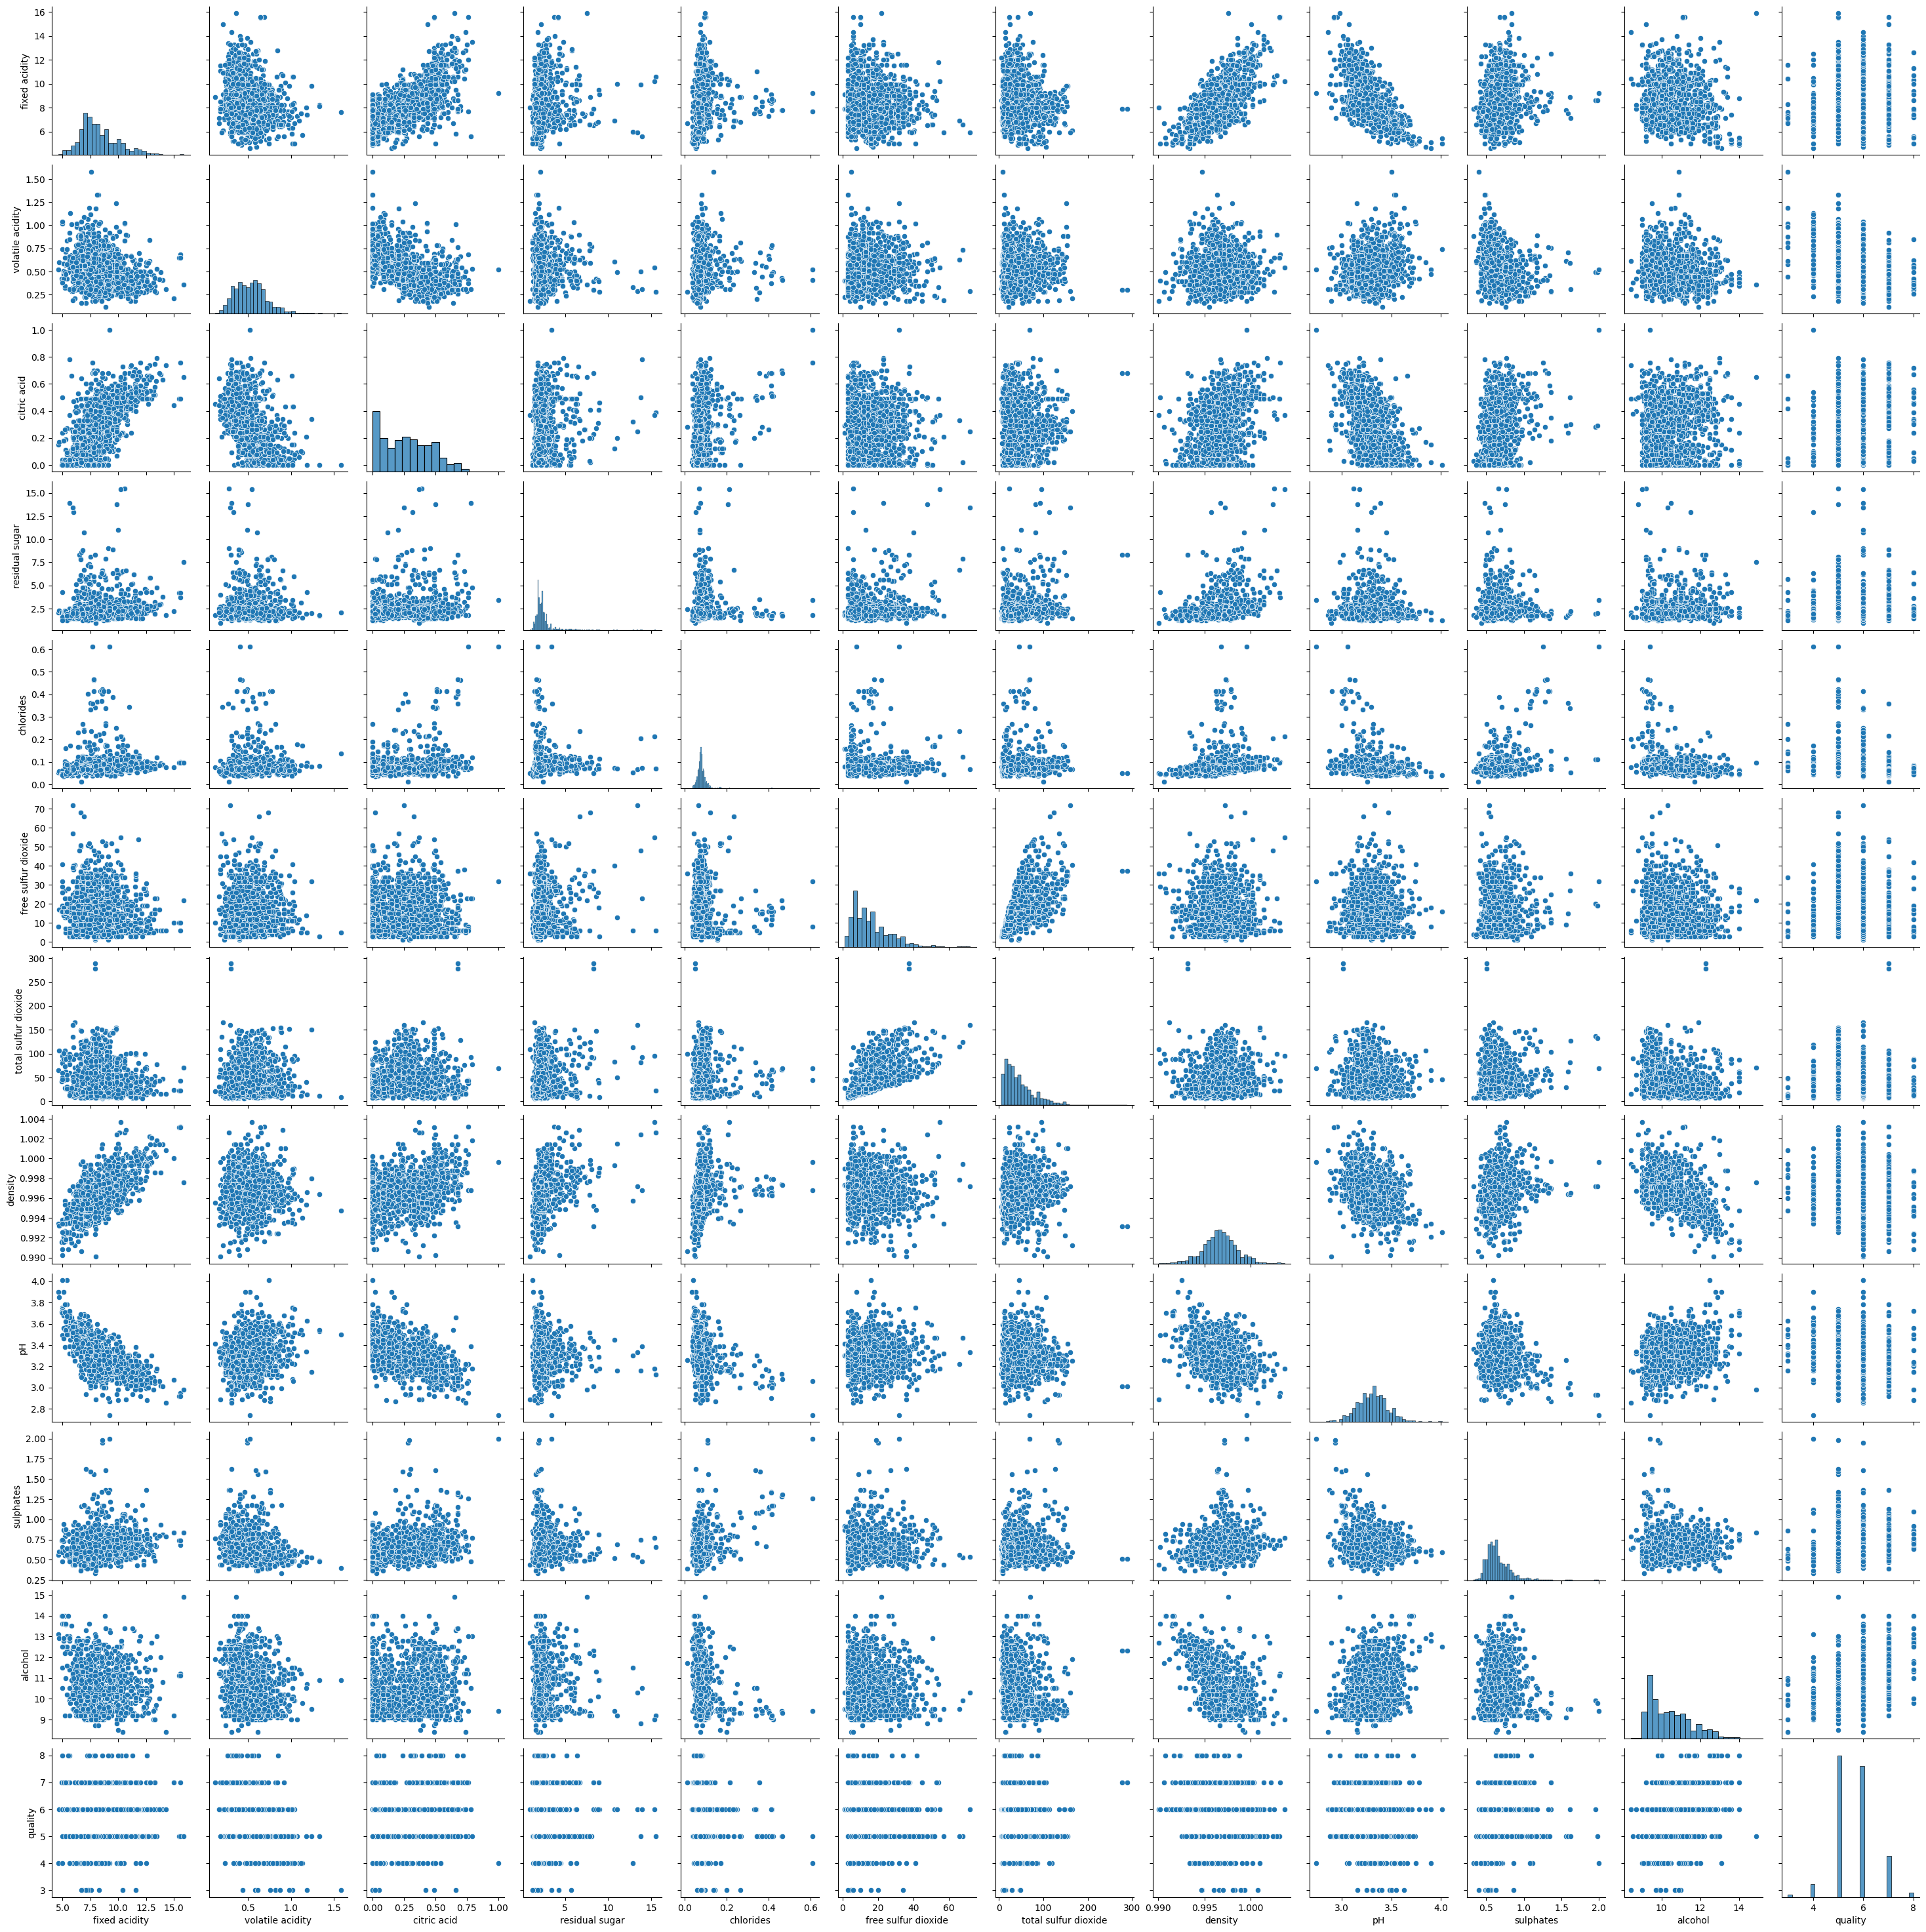

In [ ]:
sns.pairplot(df)

# Observation

A pairplot was used to visually inspect pairwise relationships among numerical features and the target variable. Most relationships appear weak to moderate, with no strong linear dependency

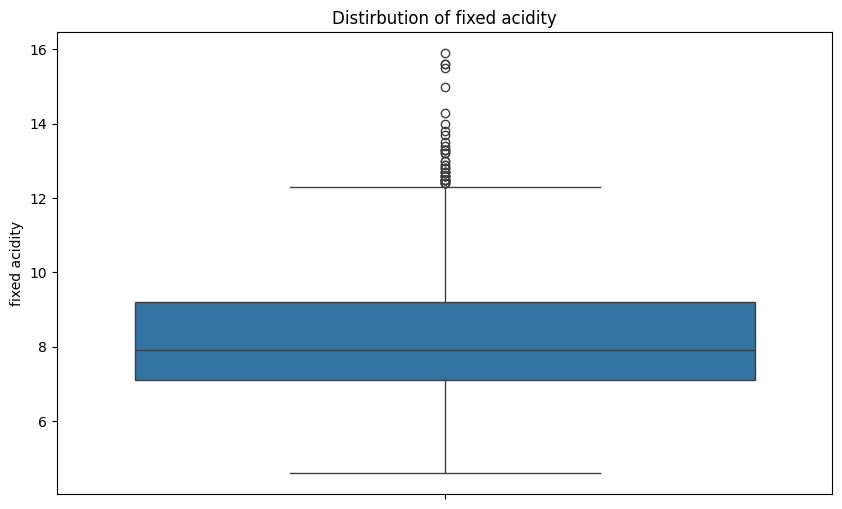

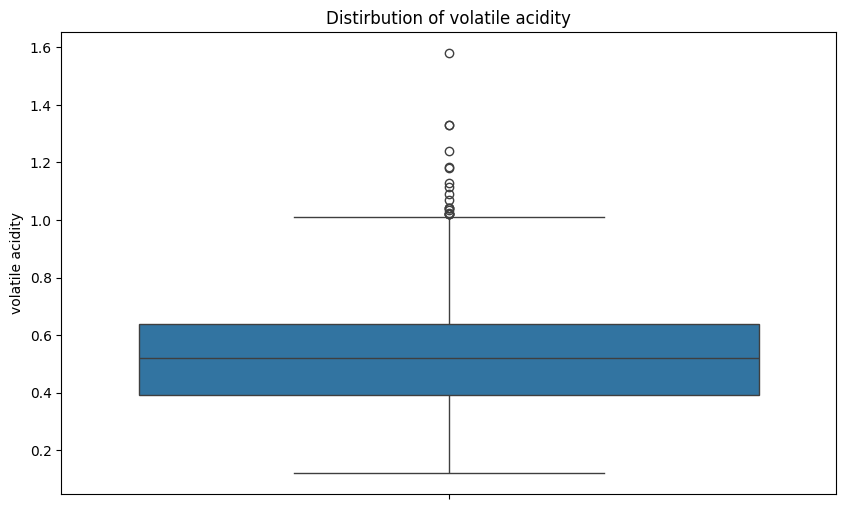

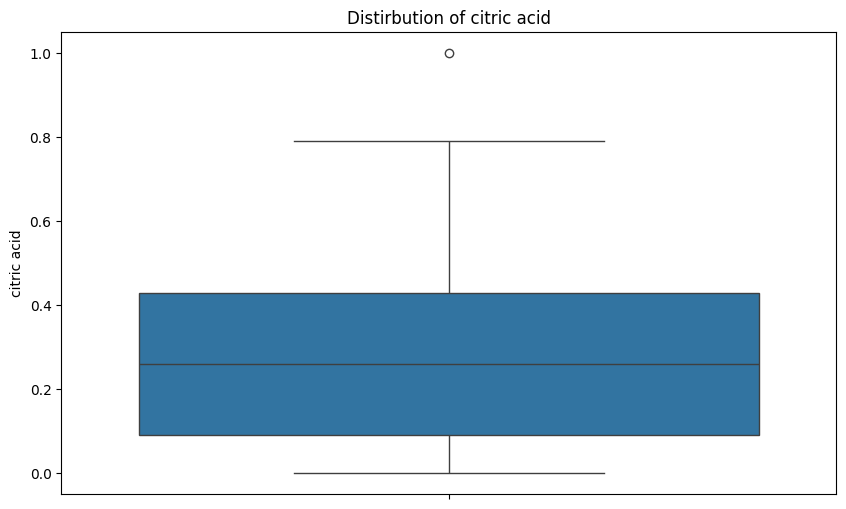

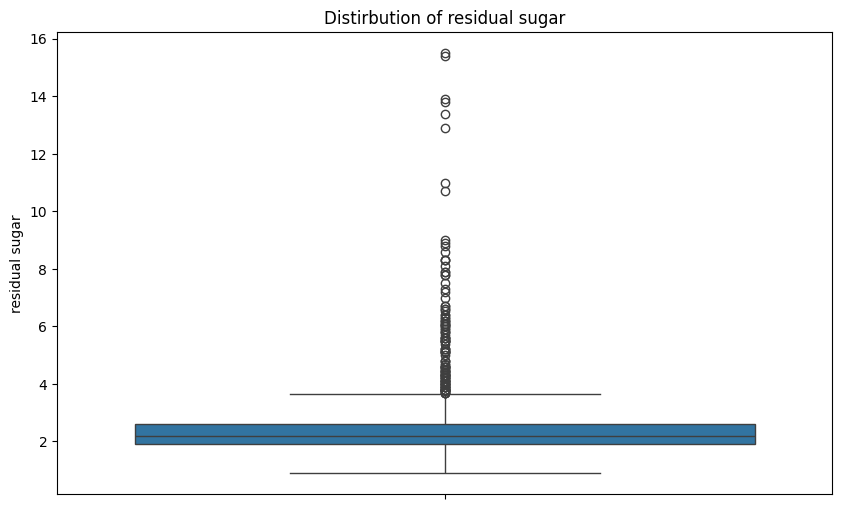

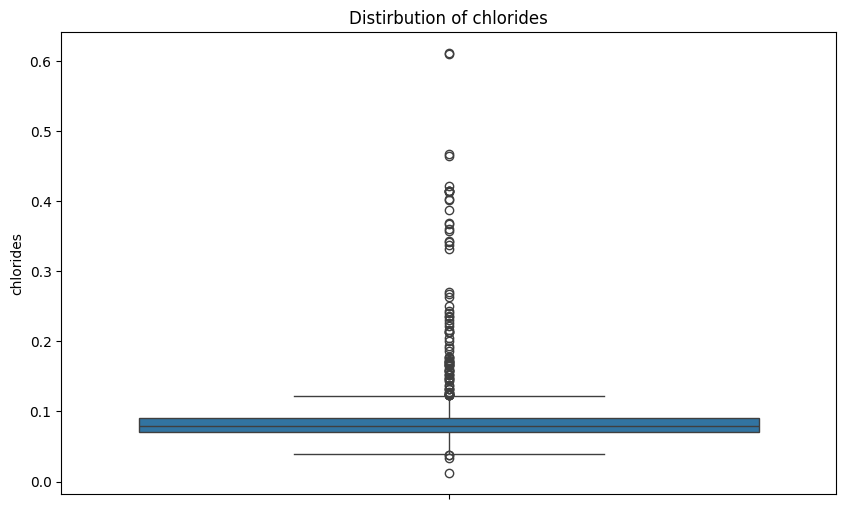

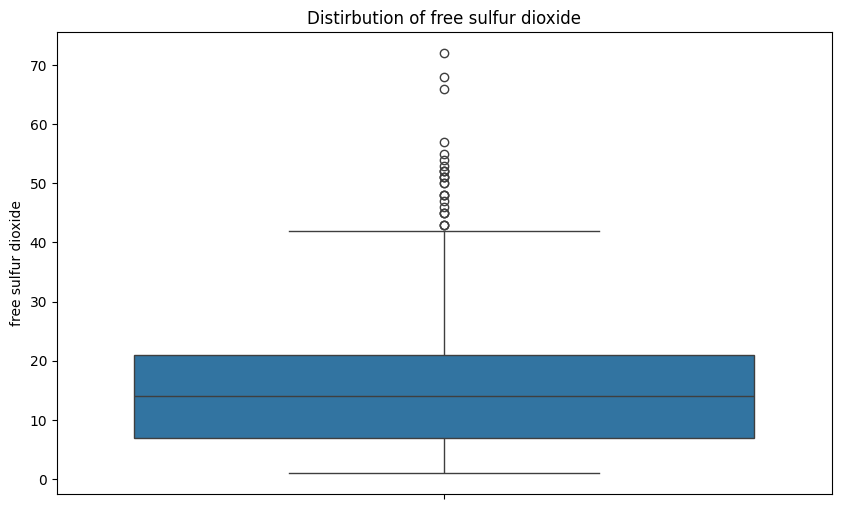

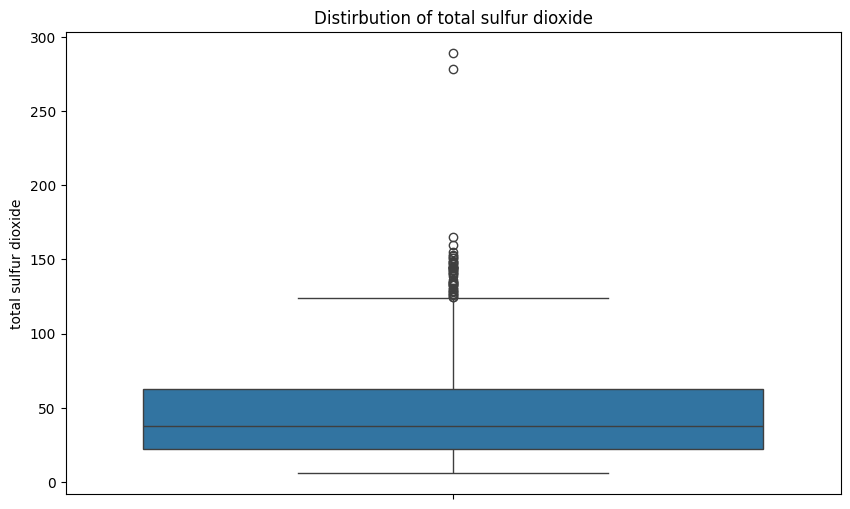

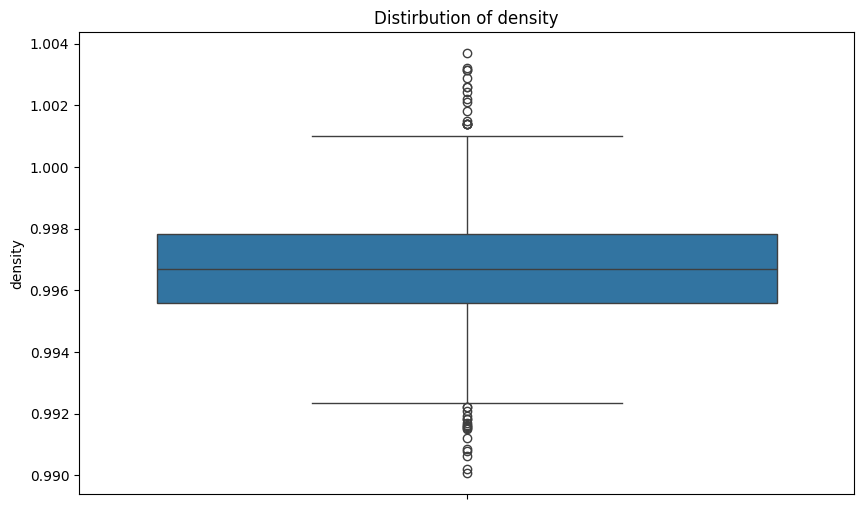

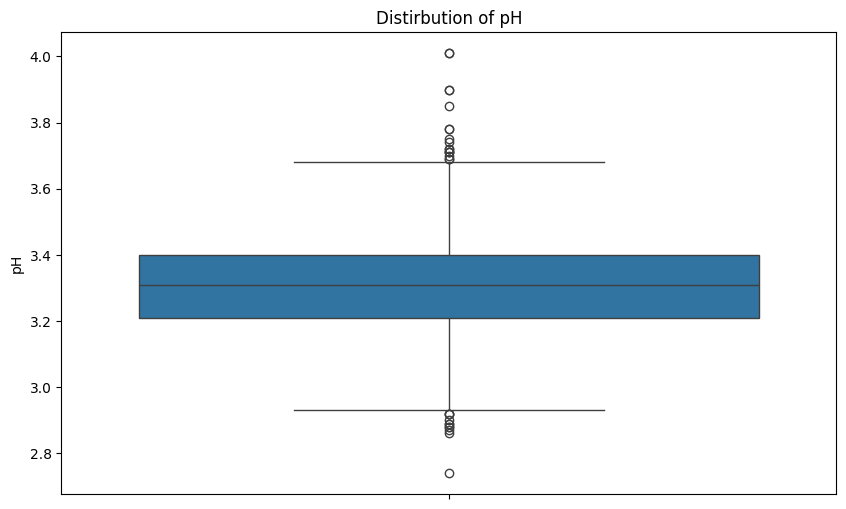

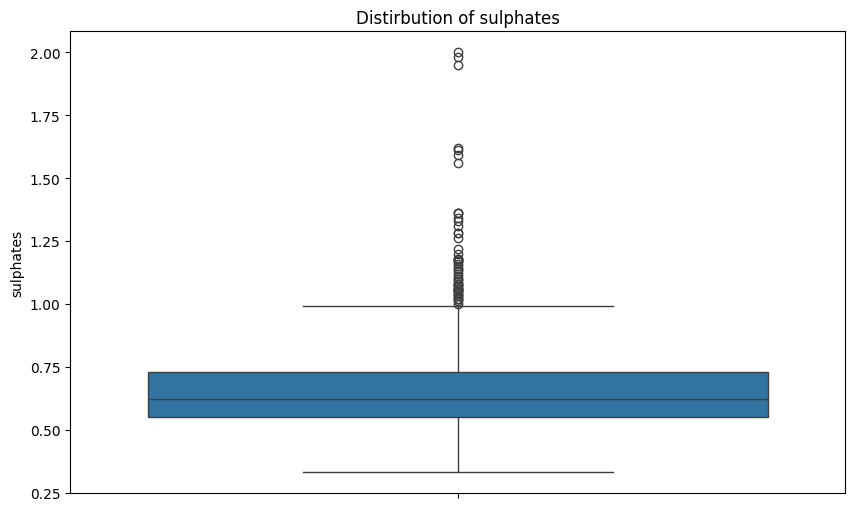

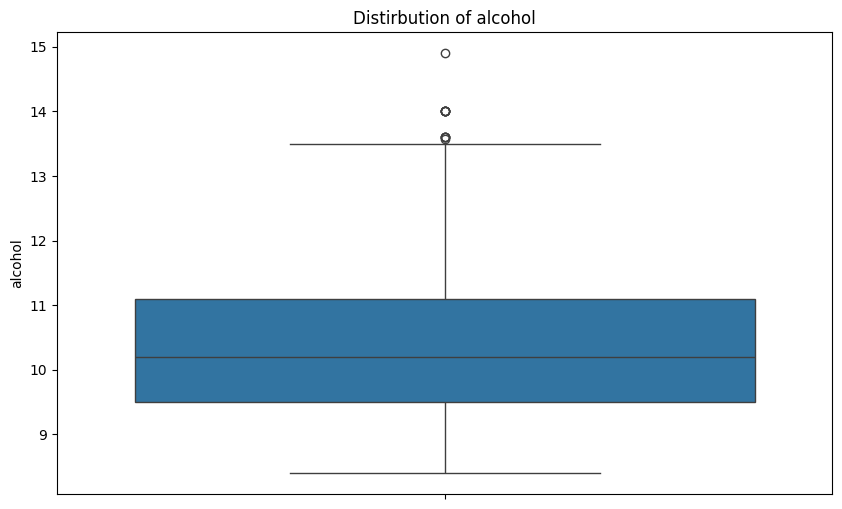

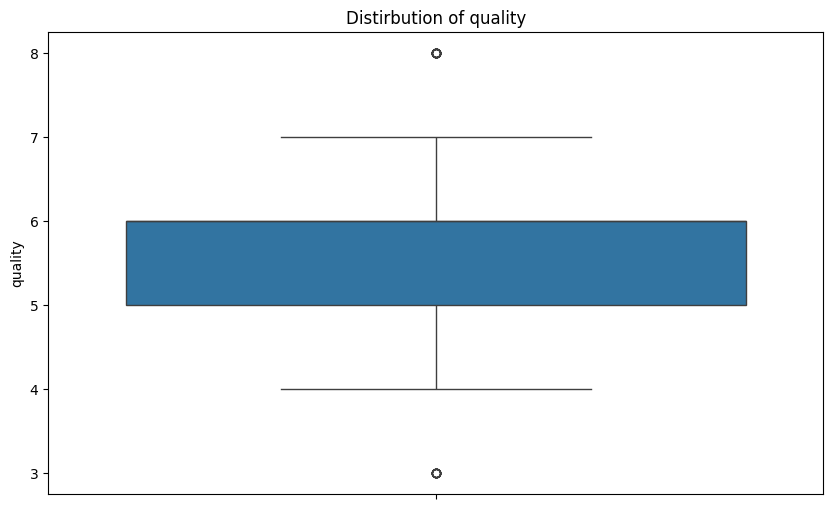

In [ ]:
for column in df.columns:
  plt.figure(figsize = (10,6))
  sns.boxplot(df[column])
  plt.title(f'Distirbution of {column}')
  plt.show()

# Observation

Most wines have moderate fixed acidity, while a small number of wines exhibit unusually high acidity values.

# BIVARIATE

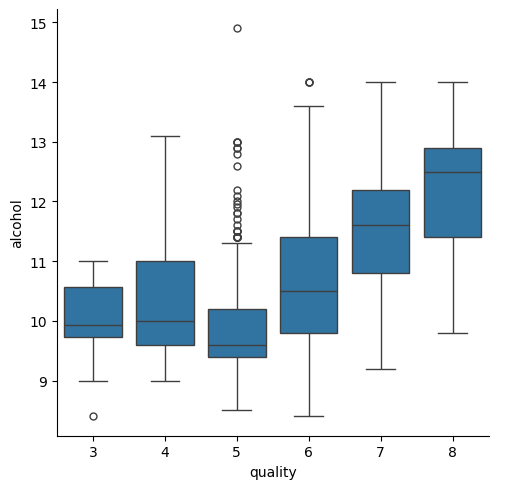

In [ ]:
sns.catplot(x='quality', y='alcohol', data=df, kind="box")

# Observation

Moderate quality wines dominate the dataset → most wines are 5 or 6 in quality.

High alcohol outliers exist even in these moderate-quality wines → alcohol alone does not guarantee high quality.

Outliers tell us about variability → Some moderate-quality wines have unusually high alcohol, but their quality is still moderate.

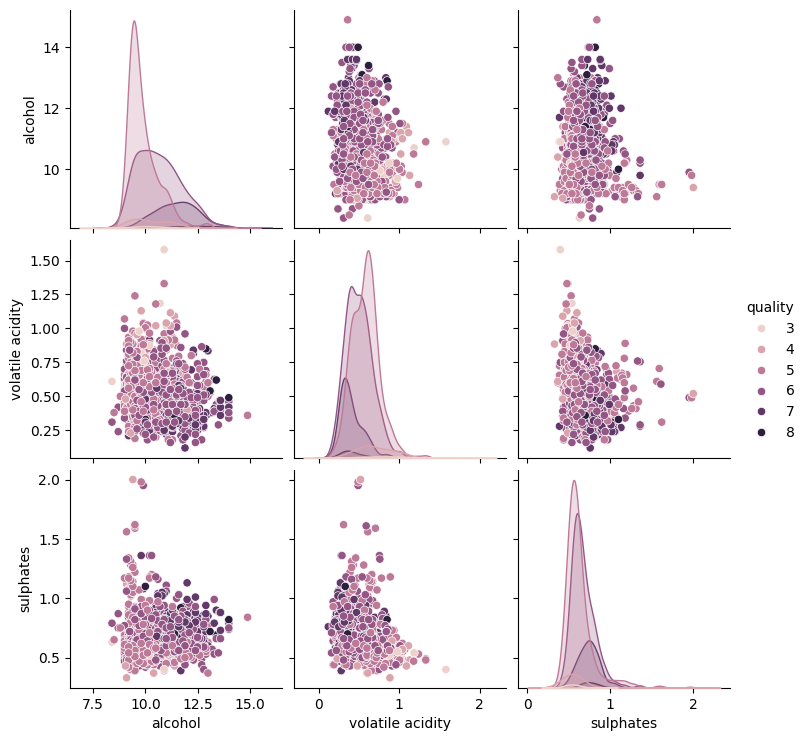

In [ ]:
sns.pairplot(df[['alcohol','volatile acidity','sulphates','quality']], hue='quality')
plt.show()

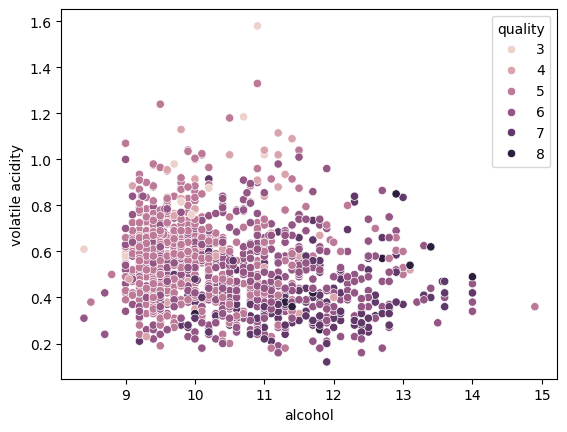

In [ ]:
sns.scatterplot(x = 'alcohol', y = 'volatile acidity', data = df, hue = 'quality')
plt.show()

# Observation

The scatter plot shows a negative relationship between alcohol and volatile acidity.
Low-quality wines are characterized by higher volatile acidity and lower alcohol content, while high-quality wines tend to have higher alcohol and lower volatile acidity.
Most wines in the dataset fall under medium quality (5 and 6), indicating that moderate alcohol and acidity levels dominate the dataset.